## Original Strategy

Link: https://www.quantifiedstrategies.com/stochastic-indicator-strategy/

### Original Graph

![Original Graph of Stochastic Indicator Trading Strategy](Stochastic_Indicator_Strategy.png)

### Original Stats

| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 2549043.84    |
| Net Profit                      | 2449043.84    |
| Net Profit %                    | 2449.04%      |
| Exposure %                      | 26.44%        |
| Net Risk Adjusted Return        | 9260.93%      |
| Annual Return %                 | 14.04%         |
| Risk Adjusted Return %          | 53.09%        |
| Transaction Costs               | 0.00          |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 458           |
| Avg. Profit/Loss                |  5347.26      |
| Avg. Profit/Loss %              | 0.76%         |
| Avg. Bars Held                  | 4.59          |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 4427596.8    |
| Avg. Profit                     | 13296.09       |
| Avg. Profit %                   | 1.96%         |
| Avg. Bars Held                  | 3.64          |
| Max. Consecutive Wins           | 24            |
| Largest Win                     | 97992.56      |
| Bars in Largest Win             | 2             |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      |  -1978552.96  |
| Avg. Loss                       |  -15828.42    |
| Avg. Loss %                     |  -2.46%       |
| Avg. Bars Held                  |  7.12         |
| Max. Consecutive Losses         |  4            |
| Largest Loss                    |  -144754.18    |
| Bars in Largest Loss            |  10            |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | -199663.26    |
| Max. Trade % Drawdown           | -24.95%       |
| Max. System Drawdown            | -218505.10    |
| Max. System % Drawdown          | -31.83%       |
| Recovery Factor                 | 11.21          |
| CAR/MaxDD                       | 0.44          |
| RAR/MaxDD                       | 1.67          |
| Profit Factor                   | 2.24          |
| Payoff Ratio                    | 0.84         |
| Standard Error                  | 228521.59      |
| Risk-Reward Ratio               | 0.34          |

## My Recreation of Strategy

### Imports

In [1]:
import sys
from datetime import datetime

new_path = "../"
if new_path not in sys.path:  # Avoid adding duplicates
    sys.path.append(new_path)

import matplotlib.pyplot as plt
import backtrader as bt
import backtrader.analyzers as btanalyzers
import pandas as pd
import numpy as np

from analyzers import InMarketAnalyzer, CashValueAnalyzer, SortinoRatio
from strategies import StrategyBase
from utils import print_strategy_stats, get_buy_and_hold


### Strategy Implimentation

In [2]:
class StochasticStrategy(StrategyBase):
    params = (
        ("period", 2),
        ("period_dfast", 2),
        ("lowerband", 25),
    )

    def __init__(self):
        super().__init__()
        self.stochastic = bt.indicators.StochasticFast(
            self.data,
            period=self.p.period,
            period_dfast=self.p.period_dfast,
        )

    @staticmethod
    def get_optimization_args(
        **kwargs,
    ) -> tuple[dict[str, list], dict[str, int]]:

        return {}, {}

    def long_condition(self):
        if (
            self.stochastic.lines.percD[0] < self.p.lowerband
        ):
            return True
        return False

    def close_condition(self):
        if (
            self.datas[0].close[0] > self.datas[0].high[-1]
        ):
            return True
        return False

### Backtesting

#### COO: False, COC: False

In [3]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=False)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/NASDAQ.csv', todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(StochasticStrategy, period=2, period_dfast=2, lowerband=25)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(False)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1985-10-04, BUY EXECUTED, 110.870003
1985-10-10, SELL EXECUTED, 108.629997
1985-10-22, Buy Order Margin
1985-10-29, BUY EXECUTED, 113.820000
1985-10-30, SELL EXECUTED, 115.400002
1985-12-10, BUY EXECUTED, 127.485001
1985-12-11, SELL EXECUTED, 127.974998
1985-12-19, BUY EXECUTED, 131.139999
1985-12-23, SELL EXECUTED, 132.259995
1985-12-26, BUY EXECUTED, 130.029999
1985-12-30, SELL EXECUTED, 131.485001
1986-01-06, BUY EXECUTED, 130.550003
1986-01-08, SELL EXECUTED, 132.789993
1986-01-10, BUY EXECUTED, 128.800003
1986-01-16, SELL EXECUTED, 131.535004
1986-01-22, BUY EXECUTED, 131.089996
1986-01-27, SELL EXECUTED, 130.205002
1986-02-26, BUY EXECUTED, 139.399994
1986-02-28, SELL EXECUTED, 140.899994
1986-03-05, BUY EXECUTED, 140.544998
1986-03-07, SELL EXECUTED, 140.800003
1986-04-08, BUY EXECUTED, 146.054993
1986-04-09, SELL EXECUTED, 148.929993
1986-05-01, BUY EXECUTED, 154.910004
1986-05-05, SELL EXECUTED, 155.009995
1986-05-19, BUY EXECUTED, 154.99499

In [4]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 2032176.28      |
| Net Profit                      | 1932176.28 |
| Net Profit %                    | 301.17%    |
| Exposure %                      | 20.57%           |
| Net Risk Adjusted Return        | 39.26%      |
| Annual Return %                 | 8.08%   |
| Risk Adjusted Return %          | 39.26%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 529            |
| Avg. Profit/Loss                | 3.65                        |
| Avg. Profit/Loss %              | 0.57%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|-----------------


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 2032176.28      |
| Net Profit                      | 1932176.28 |
| Net Profit %                    | 301.17%    |
| Exposure %                      | 20.57%           |
| Net Risk Adjusted Return        | 39.26%      |
| Annual Return %                 | 8.08%   |
| Risk Adjusted Return %          | 39.26%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 529            |
| Avg. Profit/Loss                | 3.65                        |
| Avg. Profit/Loss %              | 0.57%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 3494242.95         |
| Avg. Profit                     | 9599.57     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 14      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -1562066.67        |
| Avg. Loss                       | -9467.07    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 4     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 191259.67     |
| Max. System % Drawdown          | 44.57% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 2.2369358545352758                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



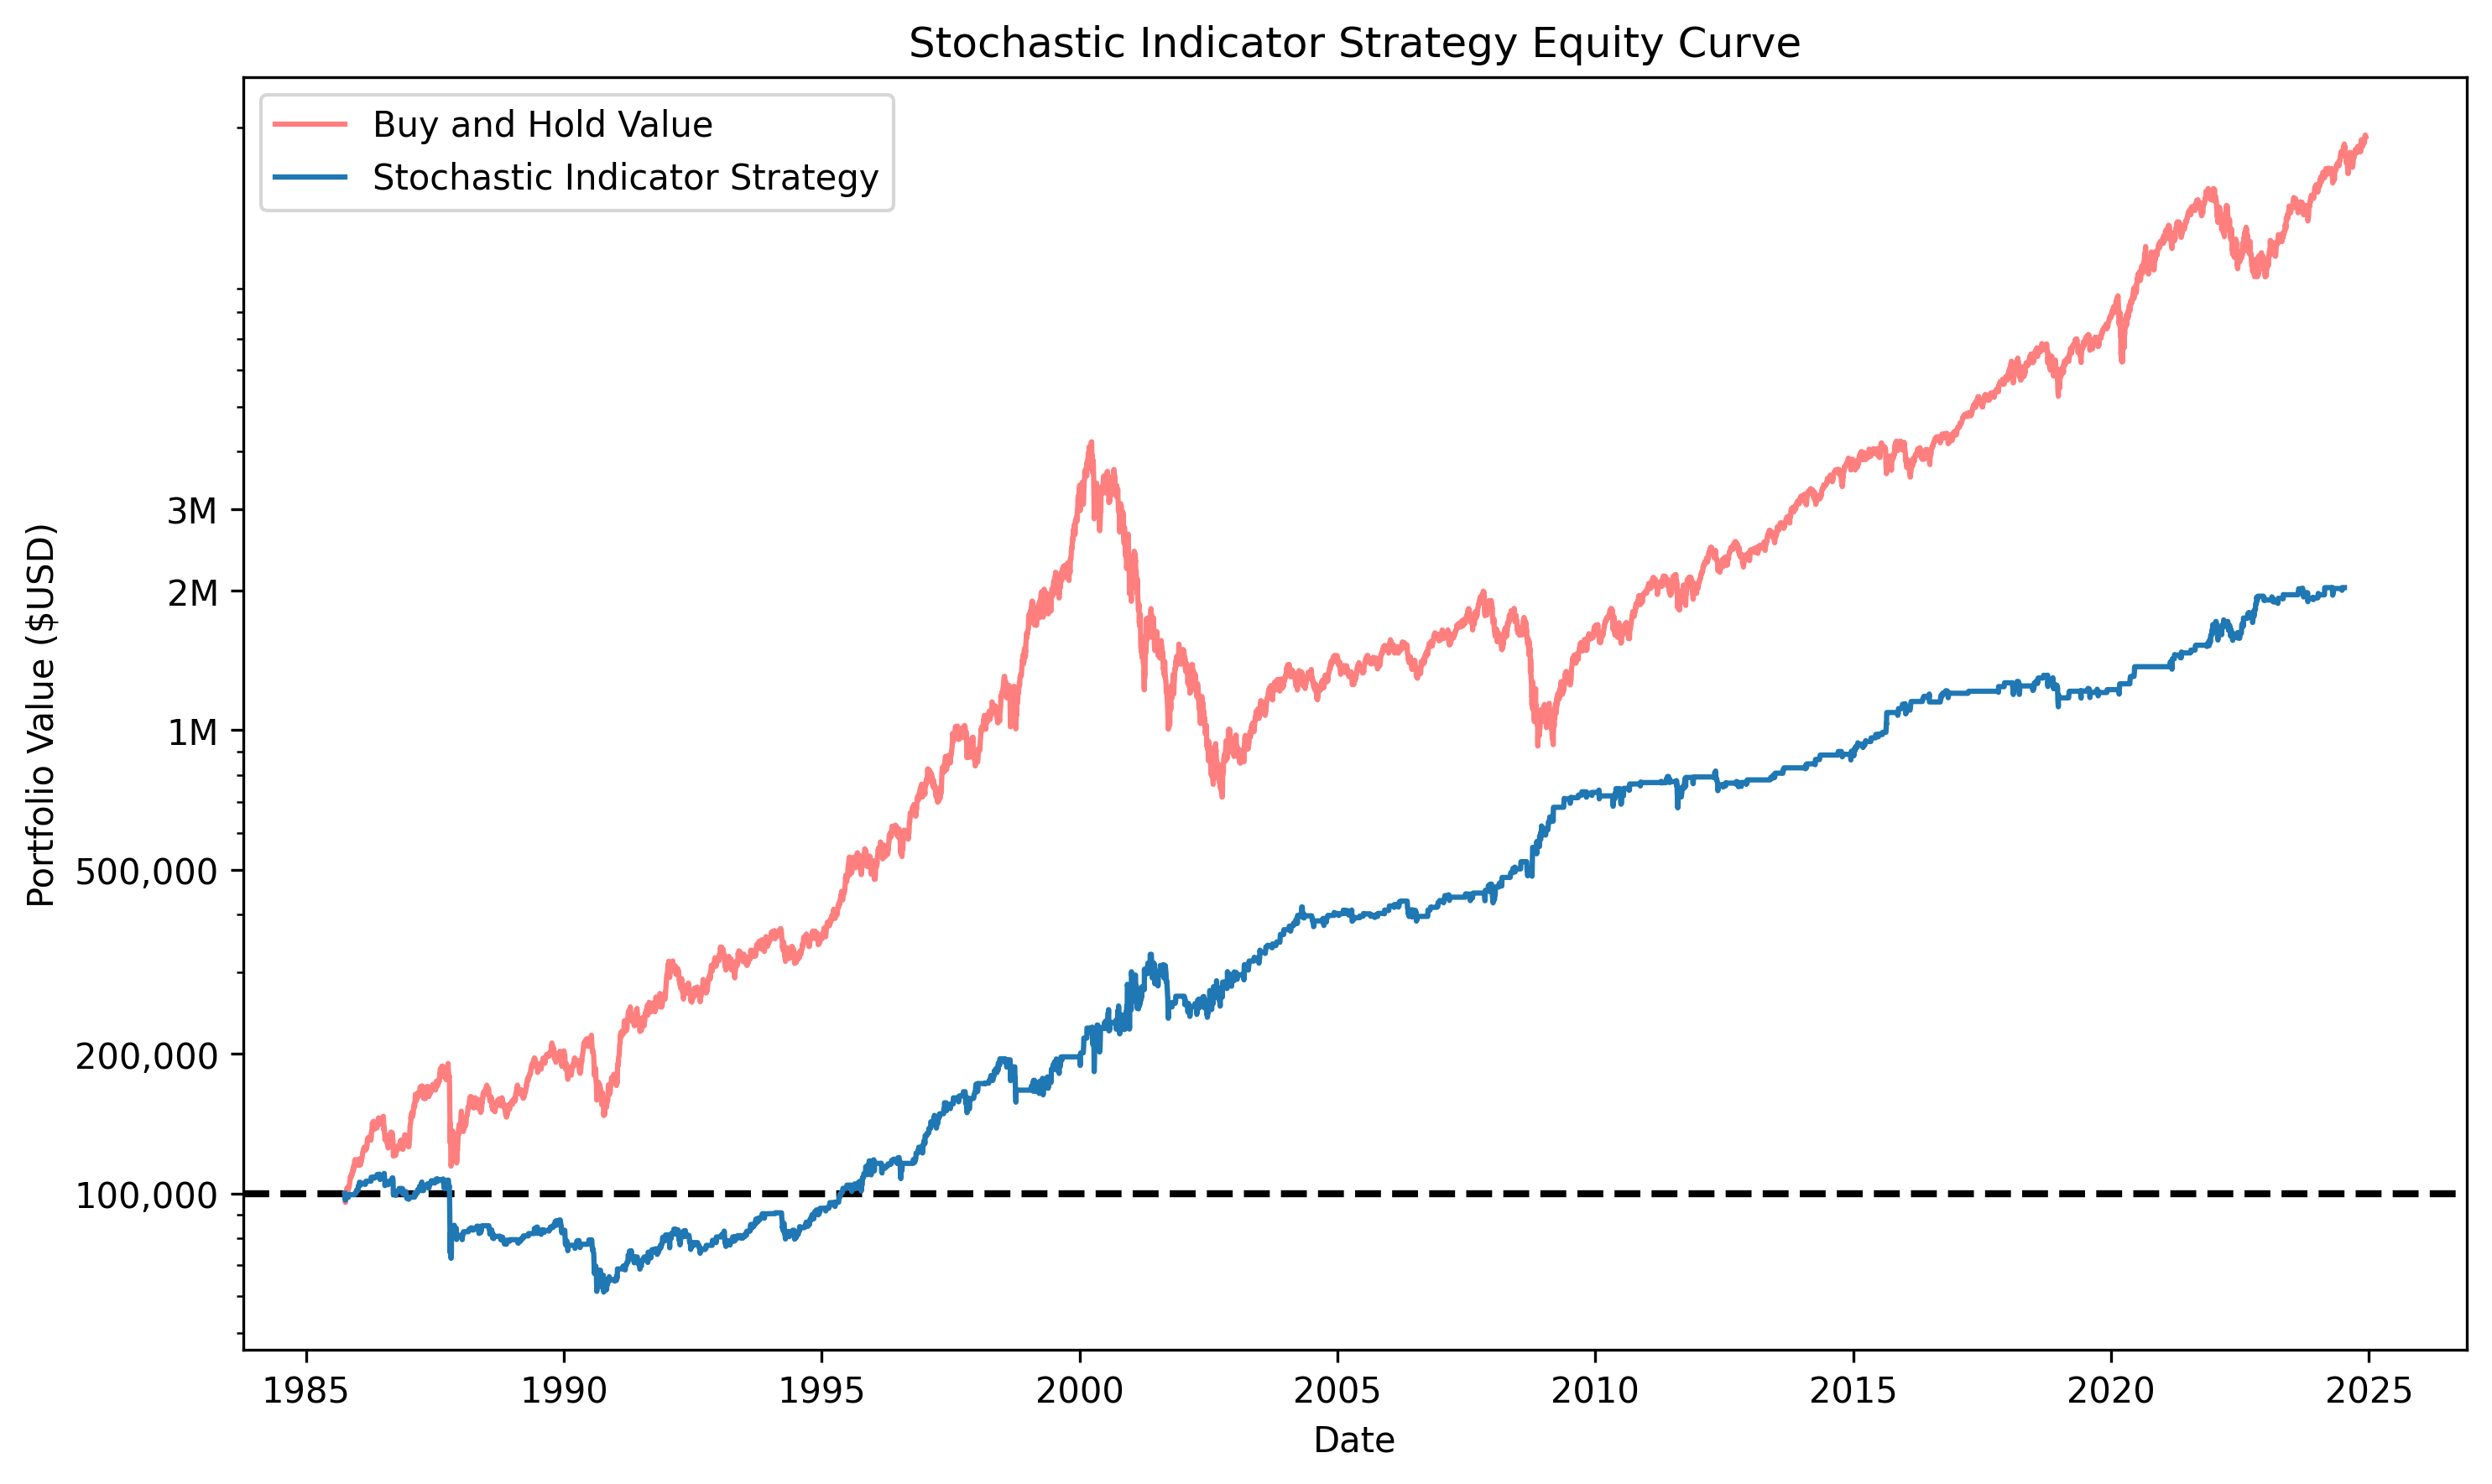

In [5]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

data = get_buy_and_hold("../data/NASDAQ.csv", initial_investment=100000)

plt.plot(data['Date'], data['BuyAndHoldValue'], 
         label='Buy and Hold Value', color='red', alpha=0.5)

plt.plot(strat[0].dates,strat[0].equity_curve, 
         label='Stochastic Indicator Strategy')

plt.title(f"Stochastic Indicator Strategy Equity Curve")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)
plt.legend()

plt.tight_layout()

#### COO: True

In [6]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=True)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/NASDAQ.csv', todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(StochasticStrategy, period=2, period_dfast=2, lowerband=25)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(False)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1985-10-04, BUY EXECUTED, 110.870003
1985-10-10, SELL EXECUTED, 108.629997
1985-10-22, BUY EXECUTED, 113.800003
1985-10-24, SELL EXECUTED, 115.065002
1985-10-29, BUY EXECUTED, 113.820000
1985-10-30, SELL EXECUTED, 115.400002
1985-12-10, BUY EXECUTED, 127.485001
1985-12-11, SELL EXECUTED, 127.974998
1985-12-19, BUY EXECUTED, 131.139999
1985-12-23, SELL EXECUTED, 132.259995
1985-12-26, BUY EXECUTED, 130.029999
1985-12-30, SELL EXECUTED, 131.485001
1986-01-06, BUY EXECUTED, 130.550003
1986-01-08, SELL EXECUTED, 132.789993
1986-01-10, BUY EXECUTED, 128.800003
1986-01-16, SELL EXECUTED, 131.535004
1986-01-22, BUY EXECUTED, 131.089996
1986-01-27, SELL EXECUTED, 130.205002
1986-02-26, BUY EXECUTED, 139.399994
1986-02-28, SELL EXECUTED, 140.899994
1986-03-05, BUY EXECUTED, 140.544998
1986-03-07, SELL EXECUTED, 140.800003
1986-04-08, BUY EXECUTED, 146.054993
1986-04-09, SELL EXECUTED, 148.929993
1986-05-01, BUY EXECUTED, 154.910004
1986-05-05, SELL EXECUTED, 

In [7]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 4479001.93      |
| Net Profit                      | 4379001.93 |
| Net Profit %                    | 380.20%    |
| Exposure %                      | 26.70%           |
| Net Risk Adjusted Return        | 38.58%      |
| Annual Return %                 | 10.30%   |
| Risk Adjusted Return %          | 38.58%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 754            |
| Avg. Profit/Loss                | 5.81                        |
| Avg. Profit/Loss %              | 0.50%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|----------------


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 4479001.93      |
| Net Profit                      | 4379001.93 |
| Net Profit %                    | 380.20%    |
| Exposure %                      | 26.70%           |
| Net Risk Adjusted Return        | 38.58%      |
| Annual Return %                 | 10.30%   |
| Risk Adjusted Return %          | 38.58%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 754            |
| Avg. Profit/Loss                | 5.81                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 7984456.89         |
| Avg. Profit                     | 15266.65     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 13      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -3605454.96        |
| Avg. Loss                       | -15608.03    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 5     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 397086.55     |
| Max. System % Drawdown          | 47.38% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 2.214549060021103                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



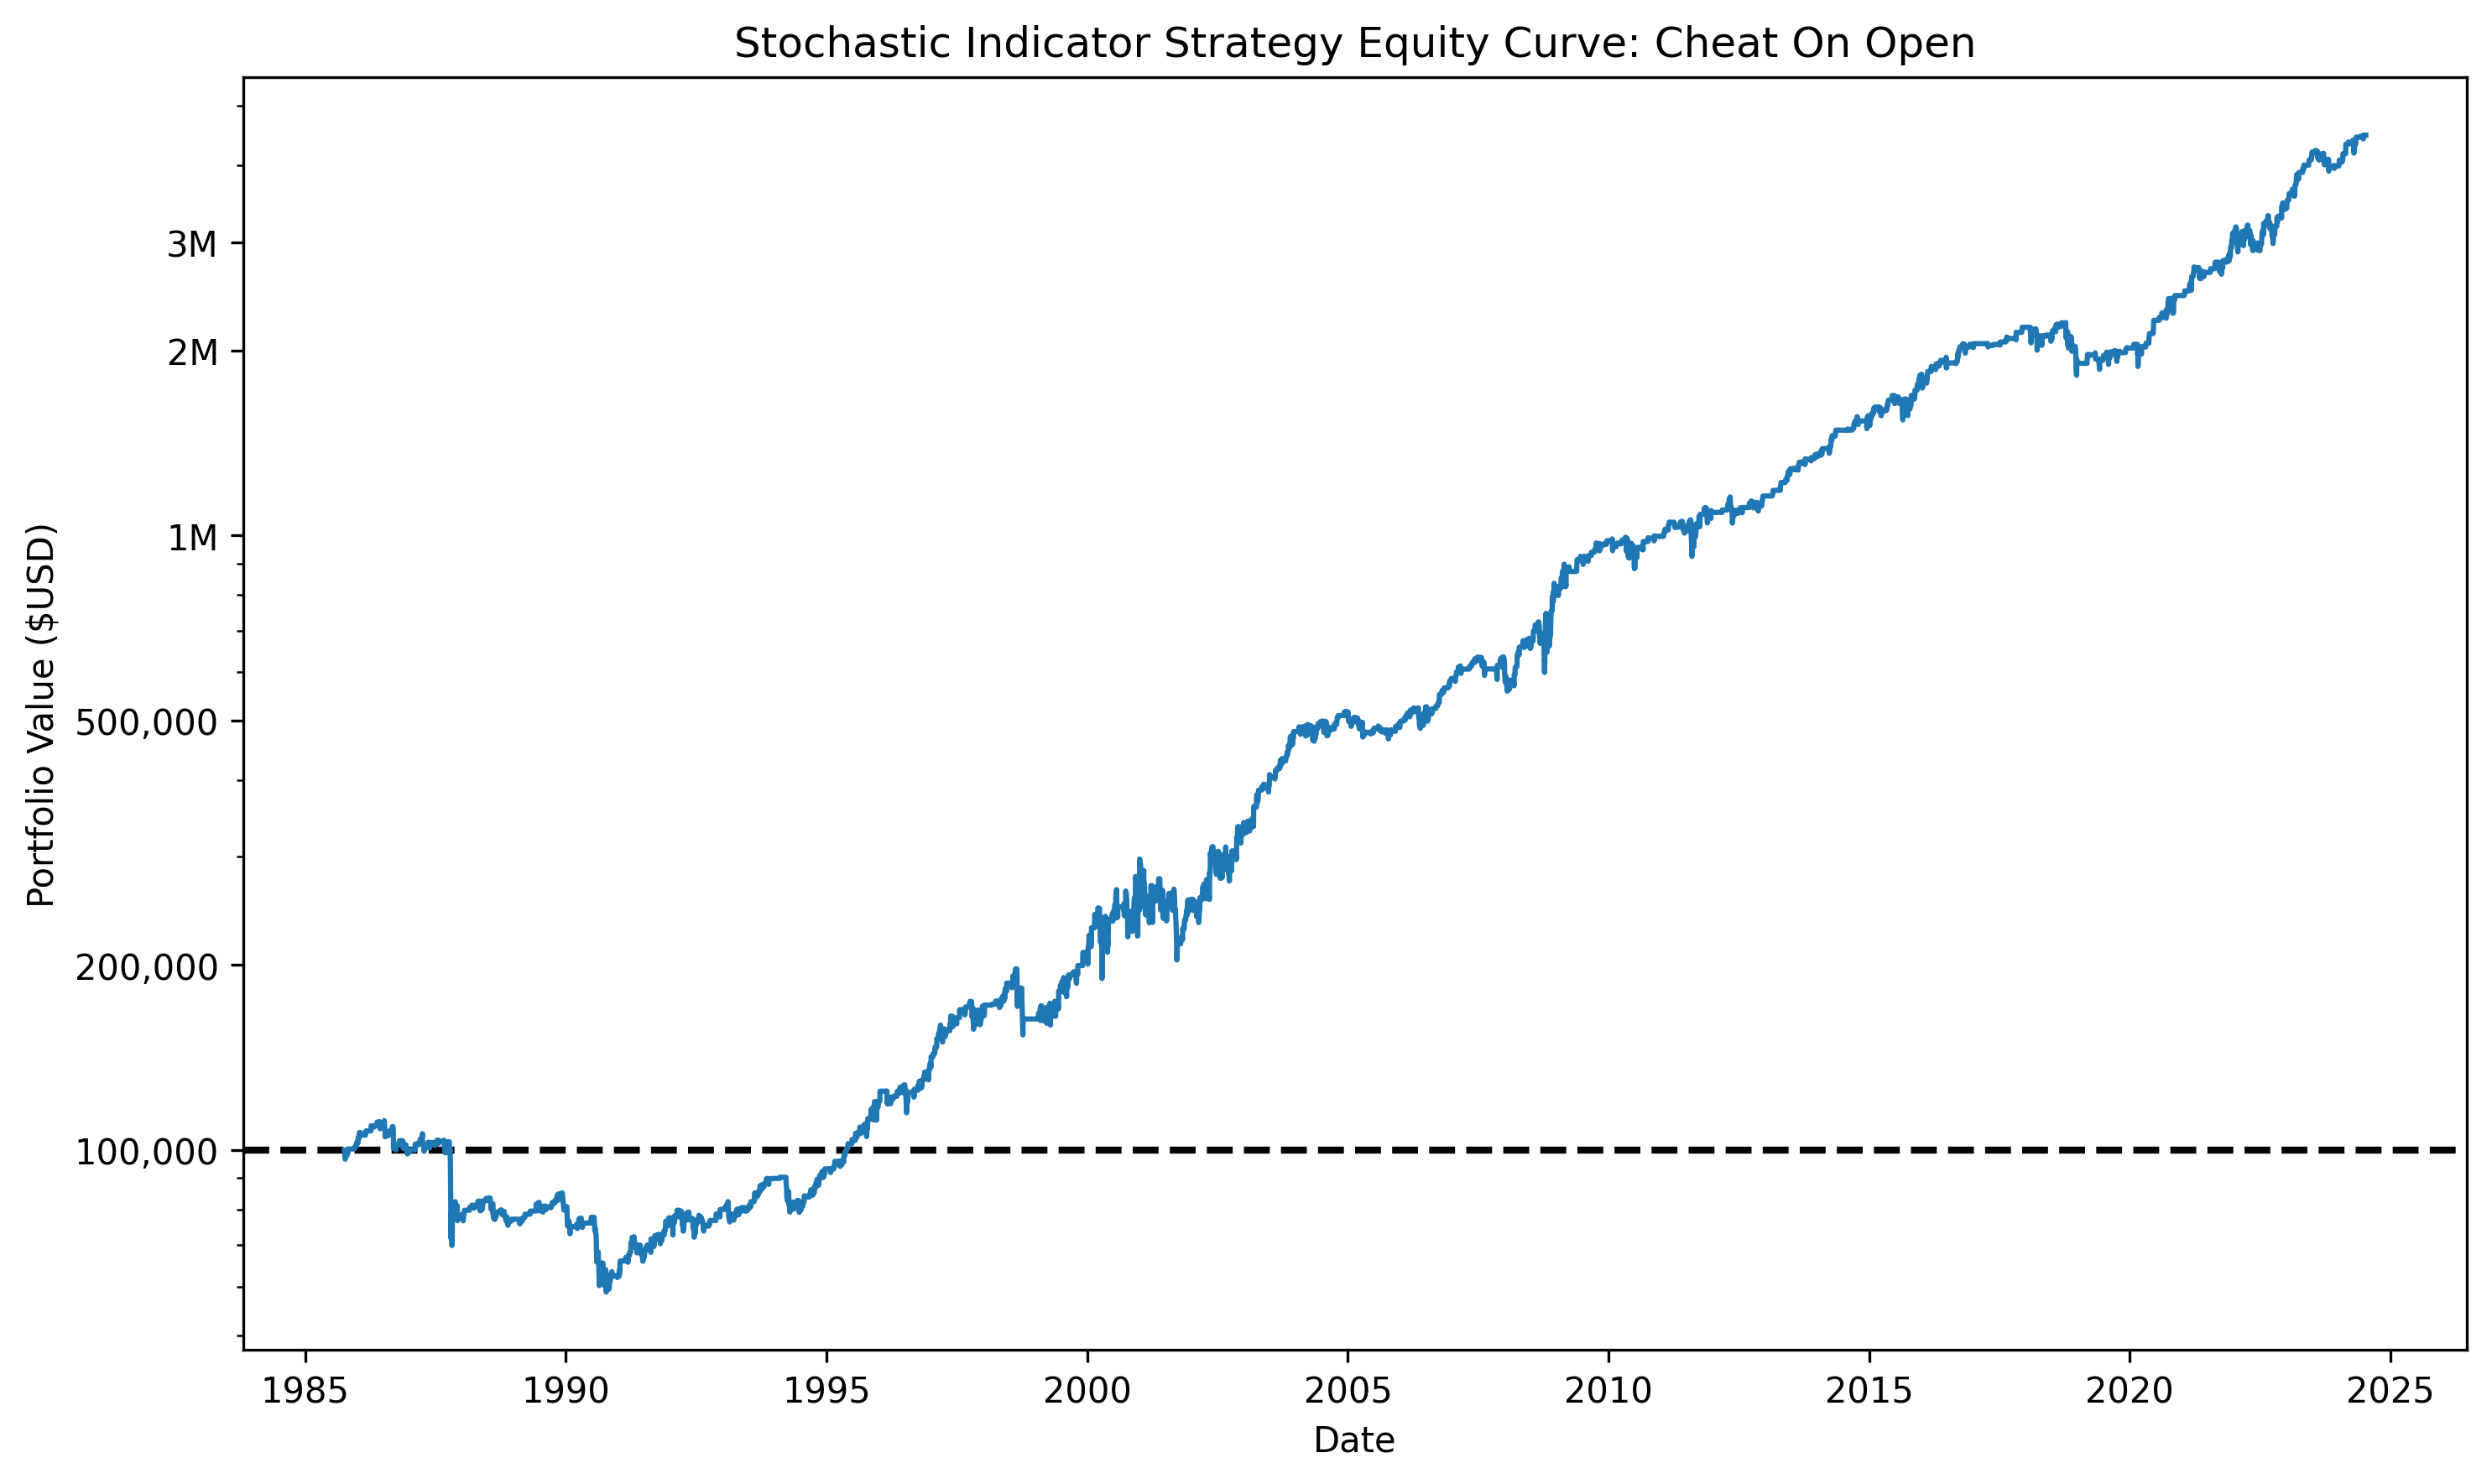

In [8]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"Stochastic Indicator Strategy Equity Curve: Cheat On Open")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()

#### COC: True

In [9]:
# Create a cerebro engine instance
cerebro = bt.Cerebro(cheat_on_open=False)
end_date = datetime(2024, 7, 12)
data = bt.feeds.YahooFinanceCSVData(dataname='../Data/NASDAQ.csv', todate=end_date, adjclose=True, round=False)
cerebro.adddata(data)

# Add the WilliamsR strategy
cerebro.addstrategy(StochasticStrategy, period=2, period_dfast=2, lowerband=25)
cerebro.broker.setcommission(commission=0.0)
cerebro.broker.set_coc(True)

# Set initial capital and broker settings
# This code was assited using Codeium autocomplete
start_cash = 100000.0000
cerebro.broker.setcash(start_cash)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trade_stats")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")
cerebro.addanalyzer(btanalyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.SharpeRatio, 
                _name='sharpe',
                timeframe=bt.TimeFrame.Days,
                compression=1,
                riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='timereturn')
cerebro.addanalyzer(InMarketAnalyzer, _name="in_market")
cerebro.addanalyzer(CashValueAnalyzer, _name="cash_value")
cerebro.addanalyzer(SortinoRatio, _name='sortino')

# Print starting capital
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
strat = cerebro.run()

# Print final capital
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1985-10-04, BUY EXECUTED, 110.870003
1985-10-10, SELL EXECUTED, 108.629997
1985-10-22, BUY EXECUTED, 113.680000
1985-10-24, SELL EXECUTED, 115.065002
1985-10-29, BUY EXECUTED, 113.820000
1985-10-30, SELL EXECUTED, 115.400002
1985-12-10, BUY EXECUTED, 127.485001
1985-12-11, SELL EXECUTED, 127.974998
1985-12-19, BUY EXECUTED, 131.139999
1985-12-23, SELL EXECUTED, 132.259995
1985-12-26, BUY EXECUTED, 130.029999
1985-12-30, SELL EXECUTED, 131.485001
1986-01-06, BUY EXECUTED, 130.550003
1986-01-08, SELL EXECUTED, 132.789993
1986-01-10, BUY EXECUTED, 128.800003
1986-01-16, SELL EXECUTED, 131.535004
1986-01-22, BUY EXECUTED, 131.089996
1986-01-27, SELL EXECUTED, 130.199997
1986-02-26, BUY EXECUTED, 139.399994
1986-02-28, SELL EXECUTED, 140.524994
1986-03-05, BUY EXECUTED, 140.544998
1986-03-07, SELL EXECUTED, 140.800003
1986-04-08, BUY EXECUTED, 146.054993
1986-04-09, SELL EXECUTED, 148.929993
1986-05-01, BUY EXECUTED, 154.910004
1986-05-05, SELL EXECUTED, 

In [10]:
print(print_strategy_stats(strat[0]))


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 8200239.30      |
| Net Profit                      | 8100239.30 |
| Net Profit %                    | 440.67%    |
| Exposure %                      | 27.14%           |
| Net Risk Adjusted Return        | 44.35%      |
| Annual Return %                 | 12.03%   |
| Risk Adjusted Return %          | 44.35%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 764            |
| Avg. Profit/Loss                | 10.60                        |
| Avg. Profit/Loss %              | 0.58%|
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------


| Metric                          | Value         |
|---------------------------------|---------------|
| Initial Capital                 | 100000.00     |
| Ending Capital                  | 8200239.30      |
| Net Profit                      | 8100239.30 |
| Net Profit %                    | 440.67%    |
| Exposure %                      | 27.14%           |
| Net Risk Adjusted Return        | 44.35%      |
| Annual Return %                 | 12.03%   |
| Risk Adjusted Return %          | 44.35%      |
| Transaction Costs               | 0.00                                  |

| All Trades                      |               |
|---------------------------------|---------------|
| Total Number of Trades          | 764            |
| Avg. Profit/Loss                | 10.60                        |
| Avg. Profit/Loss %              | N/A                                   |
| Avg. Bars Held                  | N/A                                   |

| Winners                         |               |
|---------------------------------|---------------|
| Total Profit                    | 13404981.95         |
| Avg. Profit                     | 24962.72     |
| Avg. Profit %                   | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Wins           | 33      |
| Largest Win                     | N/A                                   |
| Bars in Largest Win             | N/A                                   |

| Losers                          |               |
|---------------------------------|---------------|
| Total Loss                      | -5304742.65        |
| Avg. Loss                       | -23368.91    |
| Avg. Loss %                     | N/A                                   |
| Avg. Bars Held                  | N/A                                   |
| Max. Consecutive Losses         | 6     |
| Largest Loss                    | N/A                                   |
| Bars in Largest Loss            | N/A                                   |

| Additional Metrics              |               |
|---------------------------------|---------------|
| Max. Trade Drawdown             | N/A                                   |
| Max. Trade % Drawdown           |                                       |
| Max. System Drawdown            | 617675.86     |
| Max. System % Drawdown          | 40.96% |
| Recovery Factor                 | N/A                                   |
| CAR/MaxDD                       | N/A                                   |
| RAR/MaxDD                       | N/A                                   |
| Profit Factor                   | 2.5269806344615913                       |
| Payoff Ratio                    | N/A                                   |
| Standard Error                  | N/A                                   |
| Risk-Reward Ratio               | N/A                                   |



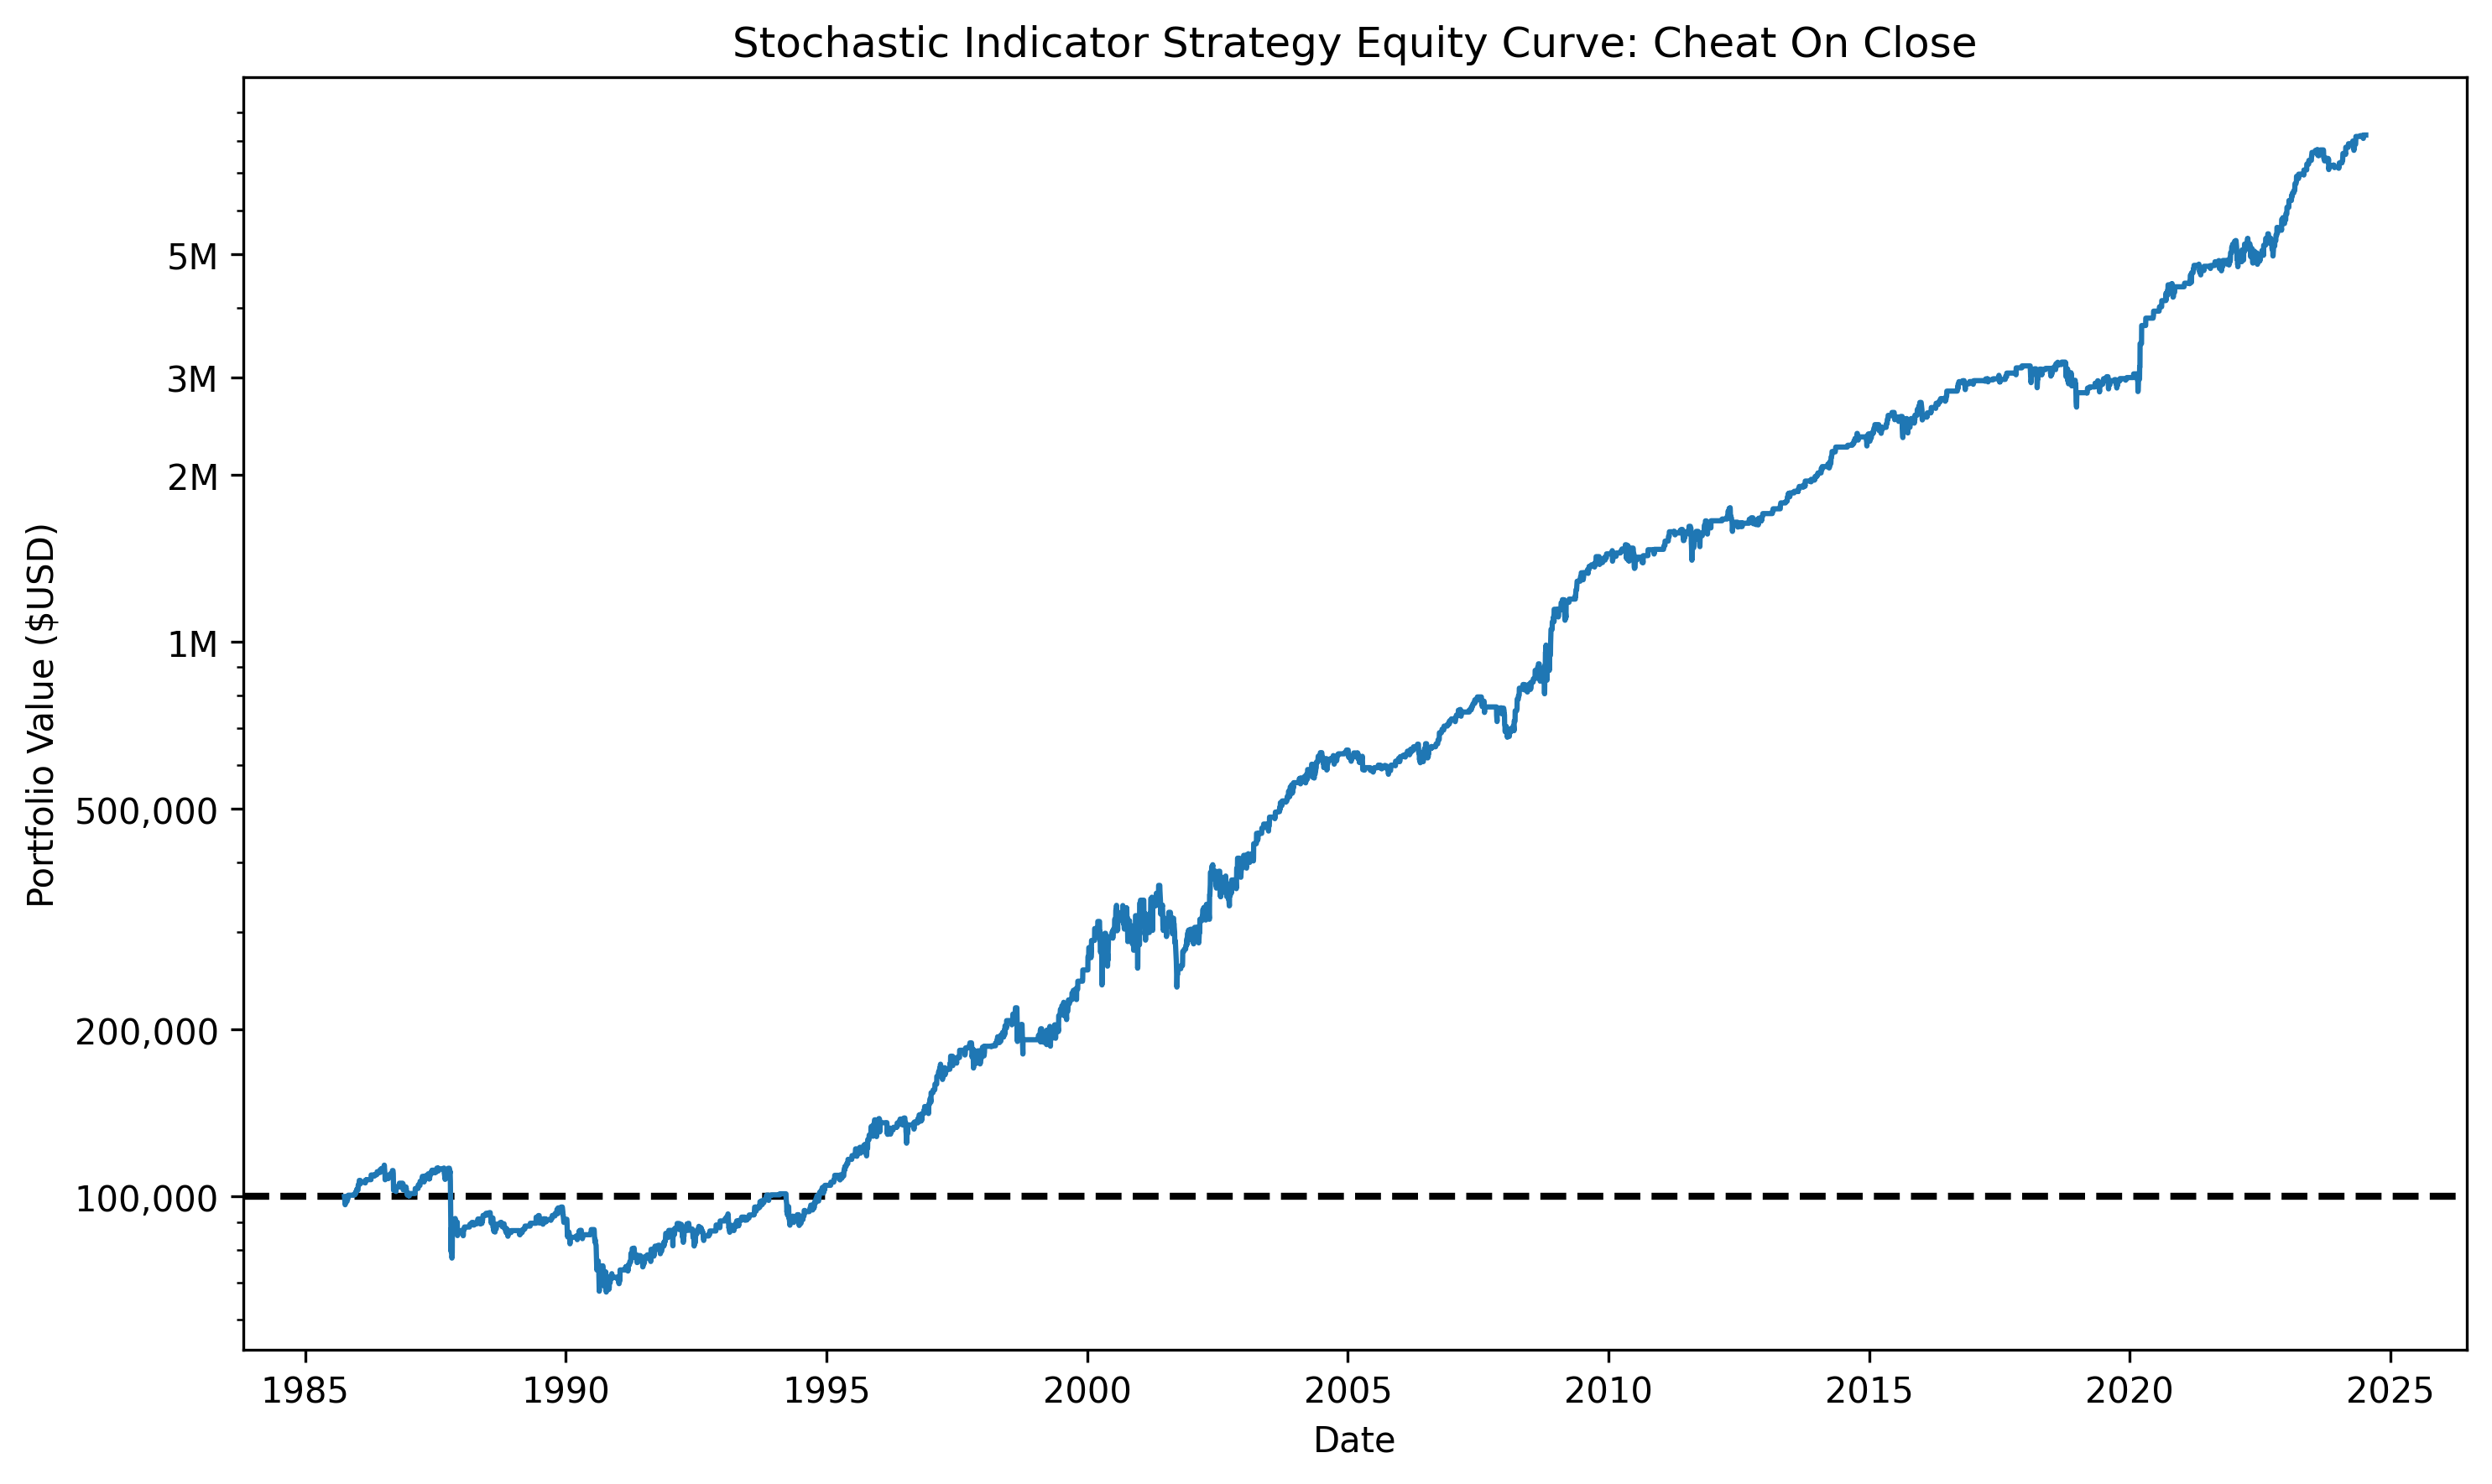

In [11]:
plt.figure(figsize=(10, 6), dpi=300)
plt.axhline(y=100000, color='black', linestyle='--', linewidth=2)

plt.plot(strat[0].dates,strat[0].equity_curve)
plt.title(f"Stochastic Indicator Strategy Equity Curve: Cheat On Close")
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($USD)')

yticks = [100000, 200000, 500000, 1000000, 2000000, 3000000, 5000000]
ytick_labels = ['100,000', '200,000', '500,000', '1M', '2M', '3M', '5M']

# Set custom y-axis ticks and labels
plt.yscale('log')
plt.yticks(ticks=yticks, labels=ytick_labels)

plt.tight_layout()